In [1]:
import crispr_hmm
from Bio import SeqIO
import os

In [2]:
ref = "ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG"

# Read data
fq_file = os.path.join(os.path.dirname(os.path.dirname(crispr_hmm.__file__)), 
                       'data', 'example.fastq')
data = SeqIO.parse(fq_file,"fastq")

# Count the occurance of sequences for faster processing
counter = {}
for record in data:
    t = record.seq._data.decode()
    
    if t.count("N")>0: # exclude sequences that contain N
        continue
        
    if t not in counter:
        counter[t] = 1
    else:
        counter[t] += 1

        
# Select the top sequences (has occurance greater or equal to k) for model fitting
k = 2
sorted_data = sorted(counter.items(), key=lambda item: item[1], reverse=True)
top_sequences_dict = [i for i in sorted_data if i[0] != ref and i[1] >= k]
top_sequences = [key for key, value in top_sequences_dict for _ in range(value)]
top_sequences_dict

[('ACACCATGGTGCATCTGACTCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 465),
 ('ACACCATGGTGCATCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 137),
 ('ACACCATGGTGCATCTGACTGTGGAGAAGTCTGCCGTTACTGCCCTG', 77),
 ('ACACCATGGTGCATCTGACTCCCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 49),
 ('ACACCATGGTGCATCTGACTCGTGGAGAAGTCTGCCGTTACTGCCCTG', 46),
 ('ACACCATGGTGGAGAAGTCTGCCGTTACTGCCCTG', 28),
 ('ACACCATGGTGCATCTGACTCTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 28),
 ('ACACCATGGTGCATCTGCCGTTACTGCCCTG', 21),
 ('ACACCATGGTGCATCTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 15),
 ('ACACCATGGTGCATCTGACTCGAAGTCTGCCGTTACTGCCCTG', 15),
 ('ACACCATGGTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 14),
 ('ACACCATGGTGCATCTGACTCGAGAAGTCTGCCGTTACTGCCCTG', 13),
 ('ACACCATGGTGCATCCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 11),
 ('ACACCATGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 9),
 ('ACACCATGGTGCATCTGACTCGGAGAAGTCTGCCGTTACTGCCCTG', 9),
 ('ACACCATGGTGCACTGTGGAGAAGTCTGCCGTTACTGCCCTG', 8),
 ('ACACCATGGTGCATCTGACTCTGAGGAGAAGTCTGCCGTTACTGCCCTG', 8),
 ('ACACCATGGTGCATCTGACTCTGCCGTTACTGCCCTG', 8),
 ('ACACCACTGTGGAGAAG

In [3]:
# initiate an CRISPR HMM model object
model = crispr_hmm.hmm_model(ref)
# estimate parameters with top sequences
model.estimate_param(top_sequences,ncores=1)

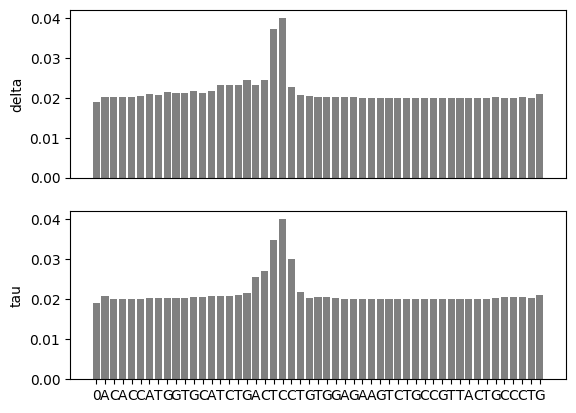

In [4]:
# plot the transition probability. Delta: match -> deletion, tau: match -> insertion
p = crispr_hmm.plot_params(model)

In [5]:
# align sequences with the Viterbi algorithm

my_sequences = [
    'ACACCATGGTGCATCTGACTCTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGACTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGACTCCCTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGACTCGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGACTCTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCATCTGACTCGAAGTCTGCCGTTACTGCCCTG',
    'ACACCATGGTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG']

for r in model.viterbi(my_sequences,ncores=1):
    print("Ref:     " + r[0])
    print("Seq:     " + r[1])
    print("log(P):  " + str(round(r[2], 2)))

Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTGACTC-TGTGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -12.26
Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTG-------TGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -14.54
Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTGACT---GTGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -12.93
Ref:     ACACCATGGTGCATCTGACTC-CTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTGACTCCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -12.56
Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTGACTC--GTGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -12.56
Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTG---------------GAGAAGTCTGCCGTTACTGCCCTG
log(P):  -17.03
Ref:     ACACCATGGTGCATCTGACTC--CTGTGGAGAAGTCTGCCGTTACTGCCCTG
Seq:     ACACCATGGTGCATCTGACTCTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
log(P):  -13.01
Ref:     ACACCATGGTGCATCTGACTCCTGTGGAGAAGT